#Telecom Churn analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df['TotalCharges']=df['TotalCharges'].replace(' ','0')
df['TotalCharges']=df['TotalCharges'].astype(float)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#checking dublicate values in unique id
df['customerID'].duplicated().sum()

np.int64(0)

In [ ]:
#checking null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#converting SeniorCitizen column in yes and no from 0 to 1
def conv(value):
  if value==1:
    return "yes"
  else:
    return "no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [ ]:
pd.set_option('display.max_columns', None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#Determine the Churn percentage based on different Parameters

<ipython-input-41-9935503172bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='Churn',palette='viridis')


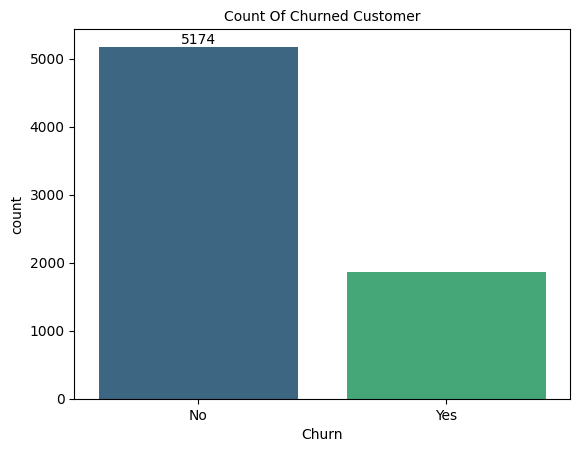

In [ ]:
#count of churn customers vs count of stayed cutomers by countplot
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(data=df,x='Churn',palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('Count Of Churned Customer',fontsize=10)
plt.show()

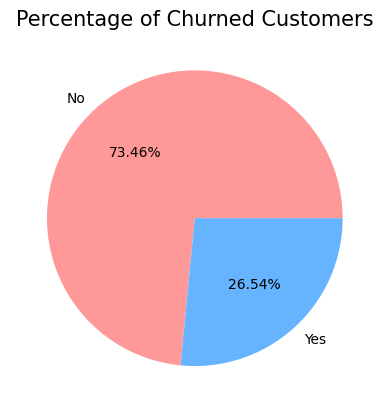

<Figure size 300x400 with 0 Axes>

In [ ]:
#determining the percentage of churn vs stayed
g=df.groupby('Churn')['customerID'].count()
g
colors = ['#ff9999','#66b3ff']
plt.pie(g.values,labels=g.index,autopct='%1.2f%%',colors=colors)
plt.title('Percentage of Churned Customers',fontsize=15)
plt.figure(figsize=(3,4))
plt.show()

##***from the above analysis we can conclude that 26.54% of people have Churned out***

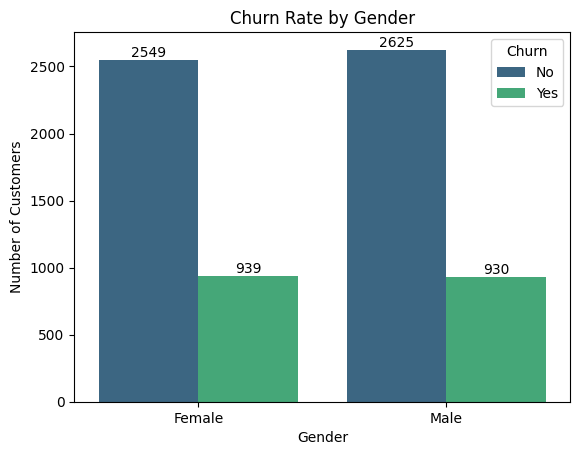

In [ ]:
#Determine number of Churned Customers on the basis of gender
import seaborn as sns
import matplotlib.pyplot as plt

g = df.groupby(['gender', 'Churn'])['customerID'].count().reset_index()
ax = sns.barplot(x='gender', y='customerID', hue='Churn', data=g, palette='viridis')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
gr=df.groupby(['SeniorCitizen','Churn']).agg({'customerID':'count'})
gr

customerID
SeniorCitizen Churn            
no            No           4508
              Yes          1393
yes           No            666
              Yes           476

Churn
No     666
Yes    476
Name: customerID, dtype: int64


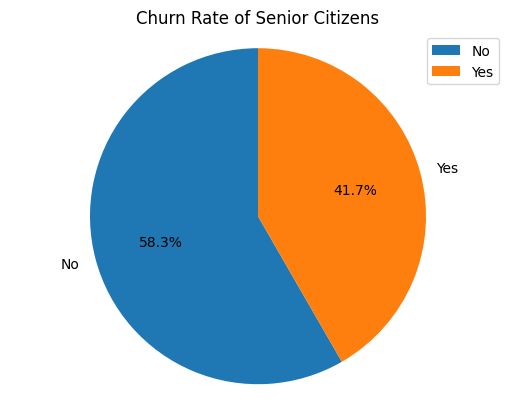

<Figure size 300x400 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Filter data for senior citizens
senior_citizens = df[df['SeniorCitizen'] == 'yes']

# Group by churn and count customers
churn_counts = senior_citizens.groupby('Churn')['customerID'].count()
print(churn_counts)
# Create pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate of Senior Citizens')
plt.legend(churn_counts.index)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(3,4))
plt.show()

##***Comparitevly a Greater Percentage of Senior Citizens have Churned out***

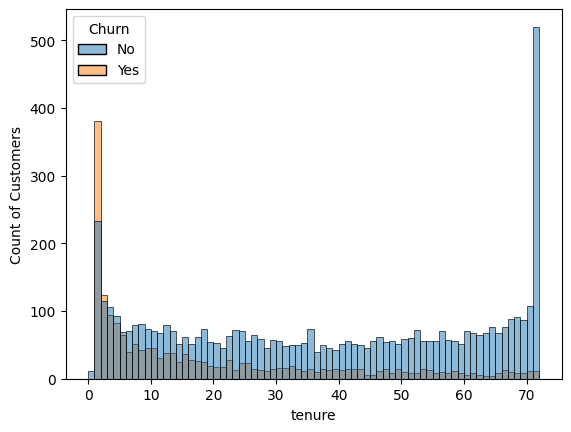

<Figure size 900x400 with 0 Axes>

In [23]:
#Determine Churn on the basis of Tenure
sns.histplot(x='tenure',hue='Churn',data=df,bins=72)
plt.ylabel('Count of Customers')
plt.figure(figsize=(9,4))
plt.show()

##***People who have used our services for long time have stayed and people who have used our services for 1 or 2 months have Churned***

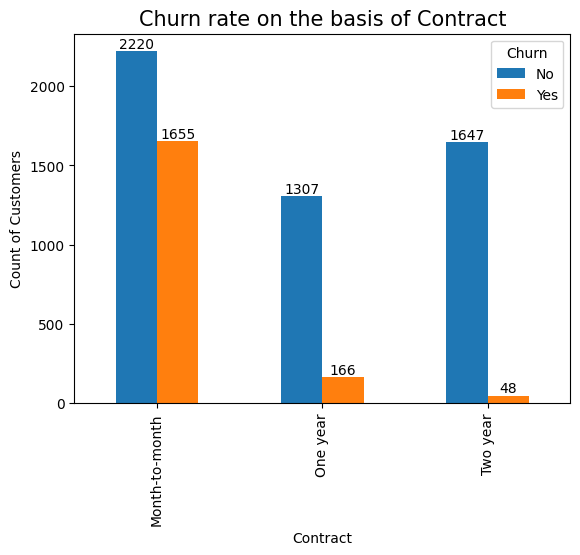

In [37]:
#Determine the effect of Contract on the basis of Churn
import matplotlib.pyplot as plt
gp=df.groupby(['Contract','Churn'])['customerID'].count().unstack()
ax=gp.plot(kind='bar')
plt.ylabel('Count of Customers')
plt.title('Churn rate on the basis of Contract',fontsize=15)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

##***"Longer-term contracts exhibit a strong negative correlation with customer churn, indicating significantly higher customer retention."***

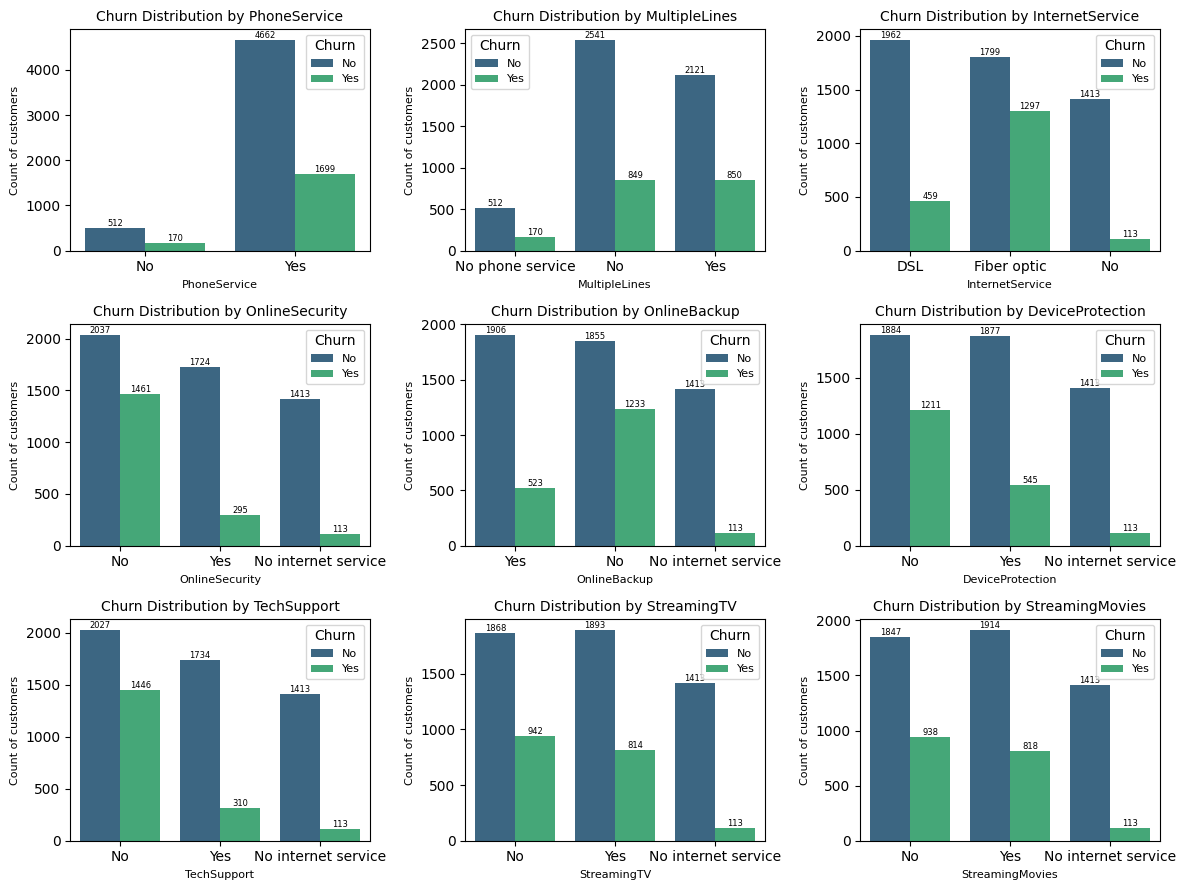

In [45]:
#Determine the Churn on the basis of Different Services

# Columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots with reduced figsize
fig, axes = plt.subplots(3, 3, figsize=(12, 9))  # Reduced figsize
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through columns and create count plots
for i, column in enumerate(columns):
    ax = axes[i]
    sns.countplot(x=column, hue='Churn', data=df, ax=ax, palette='viridis')
    ax.set_title(f'Churn Distribution by {column}', fontsize=10)  # Reduced title font size
    ax.set_xlabel(column, fontsize=8)  # Reduced x-axis label font size
    ax.set_ylabel('Count of customers', fontsize=8)  # Reduced y-axis label font size
    ax.bar_label(ax.containers[0], fontsize=6)  # Reduced count label font size
    ax.bar_label(ax.containers[1], fontsize=6)  # Reduced count label font size
    ax.legend(title='Churn', fontsize=8)  # Reduced legend font size

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and Streaming TV, churn rates are noticeably higher when these services are not used or are unavailable.

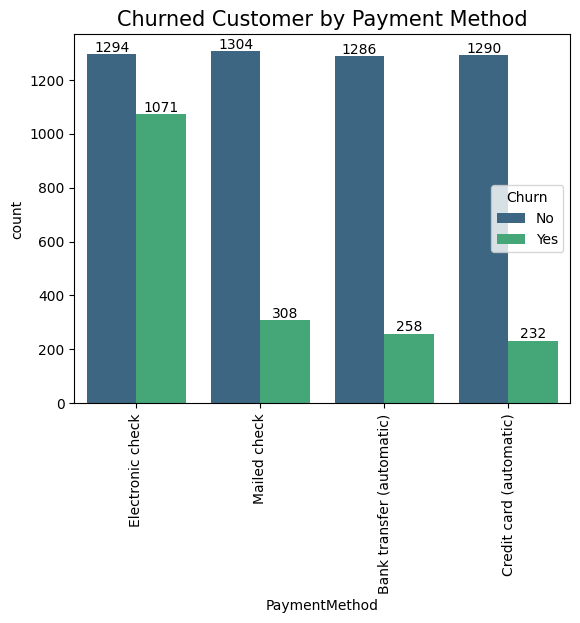

In [54]:
#Churn on the basis of Payment Method
ax=sns.countplot(data=df,x='PaymentMethod',palette='viridis',hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=90)
plt.title('Churned Customer by Payment Method',fontsize=15)
plt.show()

##Customer is likely to Churn when he is using electronic check as a payment method.